## Import libraries[](http://)

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics
#metrics and model selection imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
#Algorithm imports
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression



#visualization the dataset elements
%matplotlib inline
import seaborn as sns

## EDA

In [4]:
rawDS = pd.read_csv('/content/sample_data/marketing_campaign.csv', delimiter=';')

In [5]:
# looking head elements of dataset
rawDS.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
dataCleanValues = rawDS.copy()

#Data cleaning - Jus deleting two columns
del dataCleanValues['Z_CostContact']
del dataCleanValues['Z_Revenue']


In [7]:
#create the account age
dataCleanValues['Dt_Customer'] = pd.to_datetime(dataCleanValues['Dt_Customer'])
dataCleanValues['Dt_Customer_year_month'] = dataCleanValues['Dt_Customer'].dt.to_period("M")
dataCleanValues['account_age'] = (pd.to_datetime("2014-12").year - dataCleanValues['Dt_Customer_year_month'].dt.year)*12 + (pd.to_datetime("2014-12").month - dataCleanValues['Dt_Customer_year_month'].dt.month)

In [8]:
del dataCleanValues['Dt_Customer_year_month']
del dataCleanValues['Dt_Customer']
dataCleanValues.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,account_age
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,4,7,0,0,0,0,0,0,1,27
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,2,5,0,0,0,0,0,0,0,9
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,10,4,0,0,0,0,0,0,0,16
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,4,6,0,0,0,0,0,0,0,10
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,6,5,0,0,0,0,0,0,0,11


In [9]:
# create customer age
dataCleanValues['Age'] = 2014 - dataCleanValues["Year_Birth"]
del dataCleanValues['Year_Birth']
dataCleanValues.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,account_age,Age
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,1,27,57
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,0,9,60
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,0,16,49
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,0,10,30
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,0,11,33


In [10]:
#Review the furnished data
dataCleanValues.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,account_age,Age
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,17.195089,45.194196
std,3246.662198,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,6.639904,11.984069
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,18.000000
25%,2828.250000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,37.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,44.000000
75%,8427.750000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,55.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.000000,121.000000


In [11]:
# Fillna in Income by using avg value (Handling the missing values here to avoid misclassification)

avg_income = np.mean(dataCleanValues.Income)

dataCleanValues['Income'] = dataCleanValues['Income'].fillna(avg_income, axis = 0)

In [12]:
dataCleanValues.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,account_age,Age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,17.195089,45.194196
std,3246.662198,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,6.639904,11.984069
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,18.000000
25%,2828.250000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,37.000000
50%,5458.500000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,44.000000
75%,8427.750000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,55.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.000000,121.000000


In [13]:
#Create Dummy Variables to correct the column data
from sklearn.preprocessing import OneHotEncoder
OH_Encoder = OneHotEncoder(handle_unknown='ignore')
enc_edu_df = pd.DataFrame(OH_Encoder.fit_transform(dataCleanValues[['Education']]).toarray())

dataCleanValues = dataCleanValues.join(enc_edu_df)

dataCleanValues.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Response,account_age,Age,0,1,2,3,4
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,0,0,1,27,57,0.0,0.0,1.0,0.0,0.0
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,0,0,9,60,0.0,0.0,1.0,0.0,0.0
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,0,0,16,49,0.0,0.0,1.0,0.0,0.0
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,0,0,10,30,0.0,0.0,1.0,0.0,0.0
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,0,0,0,11,33,0.0,0.0,0.0,0.0,1.0


In [14]:
dataCleanValues.rename(columns = {0: "2n Cycle", 1: "Basic", 2: "Graduation", 3: "Master", 4: "PhD"},inplace = True)

In [15]:
enc_marital = OneHotEncoder(handle_unknown='ignore')
enc_marital_df = pd.DataFrame(OH_Encoder.fit_transform(dataCleanValues[['Marital_Status']]).toarray())

dataCleanValues = dataCleanValues.join(enc_marital_df)

dataCleanValues.rename(columns = {0: "Absurd", 1: "Alone", 2: "Divorced", 3: "Married", 4: "Single", 5: "Together", 6: "Widow", 7: "YOLO"}, inplace = True)
dataCleanValues.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,5524,Graduation,Single,58138.0,0,0,58,635,88,546,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2174,Graduation,Single,46344.0,1,1,38,11,1,6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4141,Graduation,Together,71613.0,0,0,26,426,49,127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6182,Graduation,Together,26646.0,1,0,26,11,4,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5324,PhD,Married,58293.0,1,0,94,173,43,118,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
del dataCleanValues['Marital_Status']
del dataCleanValues['Education']

In [17]:
dataCleanValues["total_Mnt"] = dataCleanValues["MntWines"] + dataCleanValues["MntFruits"] + dataCleanValues["MntMeatProducts"]+ dataCleanValues['MntFishProducts'] + dataCleanValues["MntSweetProducts"] + dataCleanValues["MntGoldProds"]

dataCleanValues['MntWines_pct'] = dataCleanValues['MntWines']/dataCleanValues['total_Mnt']
dataCleanValues['MntFruits_pct'] = dataCleanValues["MntFruits"]/dataCleanValues['total_Mnt']
dataCleanValues["MntMeatProducts_pct"] = dataCleanValues["MntMeatProducts"]/dataCleanValues['total_Mnt']
dataCleanValues["MntFishProducts_pct"] = dataCleanValues["MntFishProducts"]/dataCleanValues['total_Mnt']
dataCleanValues["MntSweetProducts_pct"] = dataCleanValues["MntSweetProducts"]/dataCleanValues['total_Mnt']
dataCleanValues["MntGoldProds_pct"] = dataCleanValues["MntGoldProds"]/dataCleanValues['total_Mnt']


In [18]:
dataCleanValues[['MntWines_pct', 'MntFruits_pct', 'MntMeatProducts_pct', 'MntFishProducts_pct', 'MntSweetProducts_pct', 'MntGoldProds_pct']].describe()

,MntWines_pct,MntFruits_pct,MntMeatProducts_pct,MntFishProducts_pct,MntSweetProducts_pct,MntGoldProds_pct
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.458481,0.049505,0.249508,0.071532,0.050777,0.120196
std,0.228411,0.055867,0.126633,0.077909,0.061184,0.108988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.289506,0.008924,0.156250,0.012571,0.008621,0.038095
50%,0.457482,0.029840,0.233447,0.048193,0.033333,0.086294
75%,0.639143,0.070237,0.328227,0.104703,0.070411,0.169768
max,0.963303,0.445545,0.997110,0.590909,0.945848,0.894150


In [19]:
# Create AcceptedCmps to count number of offers each customer accepted
dataCleanValues["AcceptedCmps"] = dataCleanValues[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4", "AcceptedCmp5"]].sum(axis = 1)

In [20]:
df_cleaned_for_DS = dataCleanValues.copy()

## Start to Create Random Forest

In [21]:
#Balanced dataset by oversampling
count_response_0, count_response_1 = df_cleaned_for_DS.Response.value_counts()
print(count_response_0)
print(count_response_1)

df_cleaned_for_DS_0 = df_cleaned_for_DS[df_cleaned_for_DS["Response"] == 0]
df_cleaned_for_DS_1 = df_cleaned_for_DS[df_cleaned_for_DS["Response"] == 1]

df_cleaned_for_DS_1_over = df_cleaned_for_DS_1.sample(n = count_response_0, replace = True)
df_cleaned_for_DS_1_over.shape

1906
334


(1906, 46)

In [22]:
df_cleaned_for_DS_resampling = pd.concat([df_cleaned_for_DS_1_over, df_cleaned_for_DS_0], axis = 0)

In [23]:
#available feature to train the model
feature = ["2n Cycle", "Basic", "Graduation", "Master", "PhD", "Absurd", "Alone", "Divorced", "Married", "Single",
            "Together", "Widow", "YOLO", "Income", "Kidhome", "Teenhome", "Recency", "MntWines_pct", "MntFruits_pct",
            "MntMeatProducts_pct", "MntFishProducts_pct", "MntSweetProducts_pct", "MntGoldProds_pct", "NumDealsPurchases",
            "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth",
            "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5",
            "AcceptedCmps", "Complain",
            "account_age", "Age"] 

In [24]:
# split the train and test dataset

X = df_cleaned_for_DS_resampling[feature]
y = df_cleaned_for_DS_resampling.Response

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.4, random_state = 123)

In [25]:
from sklearn.model_selection import GridSearchCV

## Enabling the GridSearchCV Technique to find the optimized tree depth

In [26]:
RF_classifier = RandomForestClassifier(n_estimators=30,
                             random_state=1)

max_depth_range = range(1,16)
param_grid = dict(max_depth=max_depth_range)

grid = GridSearchCV(RF_classifier,
                    param_grid,
                    cv = 10,
                    scoring = 'accuracy')

grid.fit(X_train, y_train)


grid.cv_results_

{'mean_fit_time': array([0.05624571, 0.06279662, 0.07237611, 0.0796237 , 0.08350961,
        0.09035468, 0.0996675 , 0.10326016, 0.11025705, 0.11168835,
        0.11386154, 0.11390376, 0.11523762, 0.11569245, 0.1626601 ]),
 'mean_score_time': array([0.00559578, 0.00607443, 0.00586247, 0.00595131, 0.00646172,
        0.00611069, 0.00674865, 0.00688932, 0.00664573, 0.00663755,
        0.00662284, 0.00696642, 0.00671375, 0.00665262, 0.00743384]),
 'mean_test_score': array([0.7219011 , 0.74641079, 0.78794147, 0.80764001, 0.84259366,
        0.8749502 , 0.89900598, 0.91649429, 0.92917529, 0.93835325,
        0.94709454, 0.94927986, 0.9510285 , 0.95015131, 0.95409293]),
 'param_max_depth': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1},
  {'max_

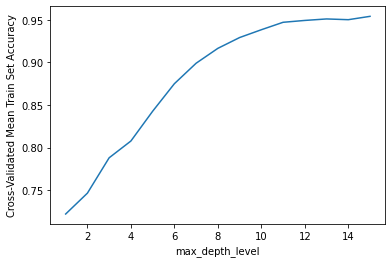

In [27]:
grid_mean_scores = grid.cv_results_["mean_test_score"]
grid_test_mean_scores = metrics
# plot the results
sns.mpl.pyplot.plot(max_depth_range, grid_mean_scores)
sns.mpl.pyplot.xlabel('max_depth_level')
sns.mpl.pyplot.ylabel('Cross-Validated Mean Train Set Accuracy');

In [28]:
best_RF_Classifier = RandomForestClassifier(n_estimators=50,
                                  random_state=1,
                                  max_depth = 12)
best_RF_Classifier.fit(X_train, y_train)

rfc_prediction = best_RF_Classifier.predict(X_test)
accuracy_train = metrics.accuracy_score(y_train, best_RF_Classifier.predict(X_train))
accuracy_test = metrics.accuracy_score(y_test, rfc_prediction)
print("Accuracy of Random Forest train is: ", accuracy_train)
print("Accuracy of Random Forest test is: ", accuracy_test)

Accuracy of Random Forest train is:  0.9938784433756013
Accuracy of Random Forest test is:  0.9639344262295082


In [29]:
# compute feature importances
pd.DataFrame({'feature':feature, 'importance':best_RF_Classifier.feature_importances_}).sort_values(by='importance',ascending=False)

,feature,importance
16,Recency,0.094621
35,account_age,0.094363
33,AcceptedCmps,0.088664
25,NumCatalogPurchases,0.061140
13,Income,0.059227
19,MntMeatProducts_pct,0.050771
17,MntWines_pct,0.042256
27,NumWebVisitsMonth,0.041605
24,NumWebPurchases,0.040541
22,MntGoldProds_pct,0.039567


In [30]:
DecisionTree_cross_val = DecisionTreeClassifier(max_depth=10, random_state=10)
DecisionTree_cross_val.fit(X_train, y_train)
cross_val_scores = cross_val_score(DecisionTree_cross_val, X_train, y_train, cv = 10)
print("10-fold accuracies:\n",cross_val_scores)
print("10-fold mean accuracy:\n",cross_val_scores.mean())

10-fold accuracies:
 [0.91703057 0.89082969 0.92139738 0.92576419 0.91266376 0.930131
 0.90829694 0.90350877 0.90350877 0.92982456]
10-fold mean accuracy:
 0.9142955642381063


In [31]:
y_test_pred_rcf = best_RF_Classifier.predict(X_test)

In [32]:
print("Classification Report:\n", metrics.classification_report(y_test,y_test_pred_rcf))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       750
           1       0.95      0.99      0.97       775

    accuracy                           0.96      1525
   macro avg       0.97      0.96      0.96      1525
weighted avg       0.96      0.96      0.96      1525



In [33]:
pred_probs_RFClassifier =  best_RF_Classifier.predict_proba(X_test)
pred_probs_RFClassifier

array([[8.96281090e-01, 1.03718910e-01],
       [4.00000000e-04, 9.99600000e-01],
       [9.10741798e-01, 8.92582017e-02],
       ...,
       [7.64685747e-01, 2.35314253e-01],
       [3.26369553e-03, 9.96736304e-01],
       [1.29733862e-02, 9.87026614e-01]])

In [34]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_probs_RFClassifier[:,1])

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

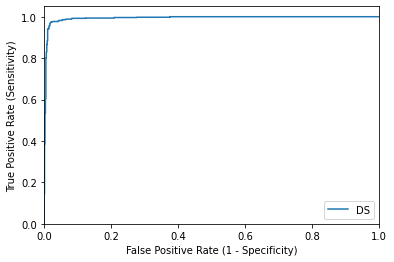

In [35]:
sns.mpl.pyplot.plot(fpr, tpr,label="DS")
sns.mpl.pyplot.xlim([0, 1])
sns.mpl.pyplot.ylim([0, 1.05])
sns.mpl.pyplot.legend(loc="lower right")
sns.mpl.pyplot.xlabel('False Positive Rate (1 - Specificity)')
sns.mpl.pyplot.ylabel('True Positive Rate (Sensitivity)')

In [36]:
print("Test AUC: ",metrics.roc_auc_score(y_test, best_RF_Classifier.predict(X_test)))

Test AUC:  0.9635698924731183
